In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import scipy.interpolate
%matplotlib inline
import seaborn as sns
import os

In [3]:
folder = '../'

In [3]:
pe = pd.read_csv(os.path.join(folder, 'photoexcited_particles.csv'),
                 sep=' ', names=['id', 'x', 'y', 'Ei'], header=0)
pe['x'] *= 1e9
pe['y'] *= 1e9

em = pd.read_csv(os.path.join(folder, 'emitted.csv'),
                 sep=' ', names=['id', 'time', 'Ef'], header=0)
em['time'] *= 1e12

df = em.merge(pe, on='id')

In [4]:
potential = pd.read_csv(os.path.join(folder, 'potential000.xyz'),
                        sep=' ', names=['x', 'y', 'V'], header=0)
band = potential[potential.y==0.1][['x']].copy()
band['V'] = potential[potential.y==0.1].V * -1
band['V'] += np.abs(band.iloc[0].V)
band['x'] *= 1e3

band_inter = scipy.interpolate.interp1d(band.x, band.V, bounds_error=False, fill_value=0.)

In [5]:
efield = pd.read_csv(os.path.join(folder, 'x_Efield000.xyz'),
                     sep=' ', names=['x', 'y', 'F'], header=0)
efield = efield[efield.y==0.1][['x', 'F']]
efield['x'] *= 1e3

In [4]:
data = pd.read_csv(os.path.join(folder, 'out_old.csv'))
df = data[data.n!=0]
df.head()

,E,mu,n,pid,std,x
1,1.925250,1.195325,18,134470,1.454026,49.483464
3,1.559400,0.820864,9,152880,0.959989,40.070891
4,2.281125,1.630095,32,196260,1.782827,68.676158
5,2.281125,1.505208,14,112510,2.207920,37.533542
6,2.281125,0.452244,44,219150,0.628947,186.946082


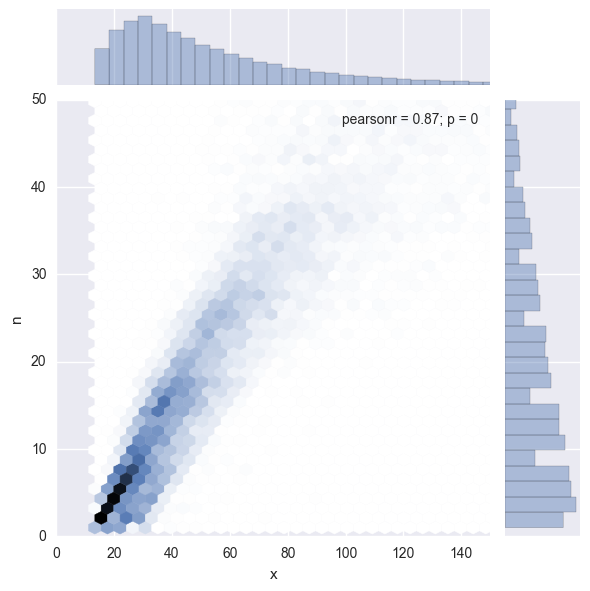

In [14]:
sns.jointplot('x', 'n', data=df, kind='hex', ylim=(0, 50), xlim=(0, 150))

In [5]:
sns.lmplot(x='x', y='n', data=df[df.pid.isin(em.id)])

NameError: name 'em' is not defined

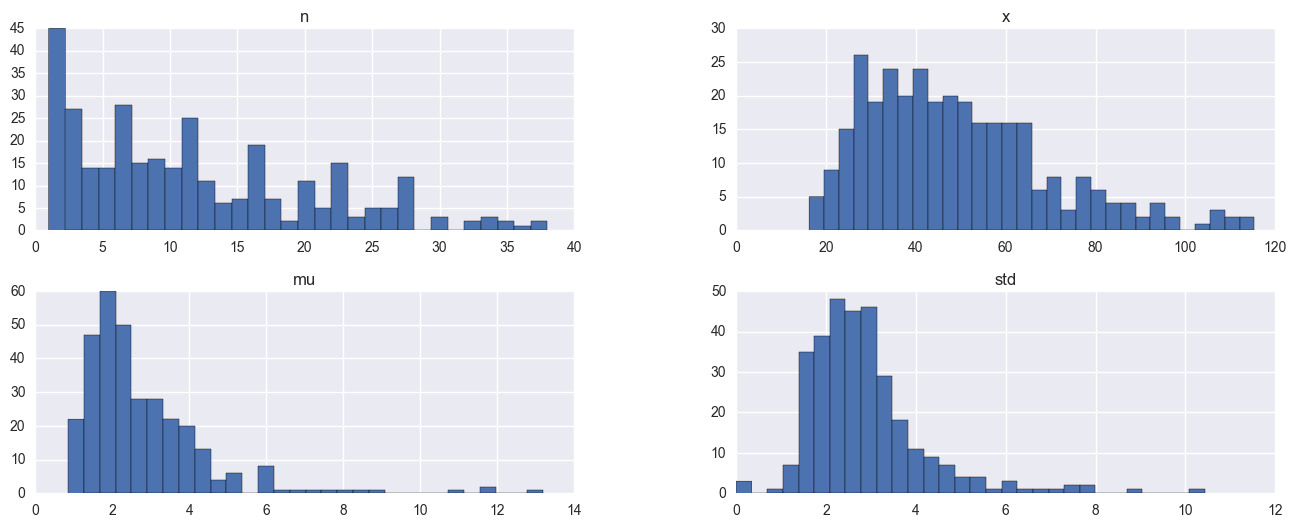

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 6))
for col, ax in zip(['n', 'x', 'mu', 'std'], np.array(axes).flatten()):
    df[df.pid.isin(em.id)].hist(col, bins=30, ax=ax)

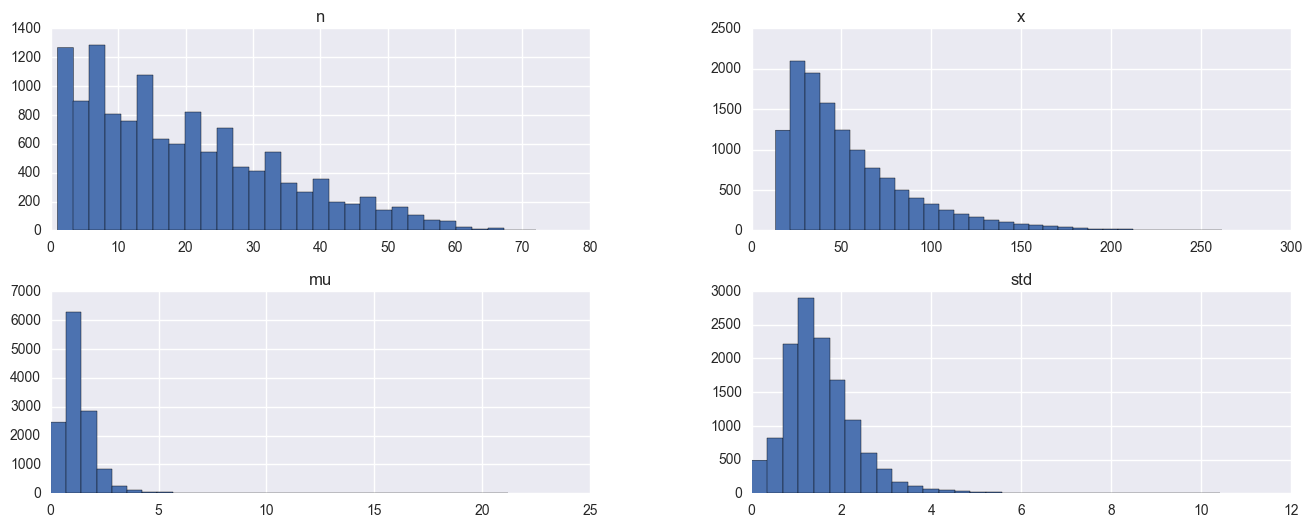

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 6))
for col, ax in zip(['n', 'x', 'mu', 'std'], np.array(axes).flatten()):
    df.hist(col, bins=30, ax=ax)